In [1]:
# -*- coding: utf-8 -*-
"""
Signal processing exam 2023.

Date: 06/01/2023
Author: Umberto Zucchelli
"""

'\nSignal processing exam 2023.\n\nDate: 06/01/2023\nAuthor: Umberto Zucchelli\n'

In [2]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, get_window, firwin
from scipy.signal.windows import general_hamming
%matplotlib inline

In [3]:
def Diff_1st_order(x,y):
    """ 
    Compute derivatives with first order backward difference approximation:
    y'(xi) = (y(xi)−y(xi−1)) / Δx 
    y''(xi) = (y(xi)−2y(xi−1)+y(xi-2) / Δx^2 
    For the first point (firsts 2 for the 2nd order derivative), 
    The forward difference approximation, that mirrors the expression above, 
    is considered 
    """
    
    N = x.shape[0]
    
    delta_x = np.empty(N)
    y_prime = np.empty(N) # 1st order derivative
    y_prime2 = np.empty(N) # 2nd order derivative
    # Forward first order differencing approx 
    delta_x[0] = x[1] - x[0]
    y_prime[0] = (y[1] - y[0]) / delta_x[0]
    y_prime2[0] = (y[2] - 2*y[1] + y[0]) / delta_x[0]**2
    # Backward first order differencing approx 
    for i in range(1, N):
        delta_x[i] = x[i] - x[i-1]
        y_prime[i] = (y[i] - y[i-1]) / delta_x[i]
        if i == 1:
            y_prime2[i] = (y[i+2] - 2*y[i+1] + y[i]) / delta_x[i]**2
        else:
            y_prime2[i] = (y[i] - 2*y[i-1] + y[i-2]) / delta_x[i]**2
        
    # In this way the first two elements will be just the opposite of each other
    # This problem could be addressed in different ways.
    # Some of them:
    # 1) Neglect the first term. Since the firsts elements of the series don't measure 
    #    important values
    # 2) Since, in fact, we have the datas for t<5s we could consider them to compute the 
    #    backward derivative also at x=t=5s 
    
    
    # To notice:
    # I could use simply: dy[0:-1] = np.diff(y)/np.diff(x)
    #                     dy[-1] = (y[-1] - y[-2])/delta_x[-1]
    # That would be equal to a forward first order diff approx, except at the last point
    # where a backward approach is used.
    
    return y_prime, y_prime2

def Diff_2nd_order(x,y):
    """ 
    Compute derivatives with second order central difference approximation:
    y'(xi) = (y(xi+1)−y(xi−1)) / 2Δx 
    y''(xi) = (y(xi+1)−2y(xi)+y(xi-1) / Δx^2 
    The derivatives for the 2 points at the edge, is computed with the forward
    differencing at the left and the backwards one on the right.
    Forward:
    y'(xi) = (-y(xi+2)+4y(xi+1)-3y(xi)) / 2Δx 
    y''(xi) = (-y(xi+3)+4y(xi+2)-5y(xi+1)+2y(xi)) / Δx^2
    Backward:
    y'(xi) = (y(xi-2)-4y(xi-1)+3y(xi)) / 2Δx 
    y''(xi) = (-y(xi-3)+4y(xi-2)-5y(xi-1)+2y(xi)) / Δx^2
    """
    
    N = x.shape[0]
    
    delta_x = np.empty(N)
    # y_prime = np.gradient(y, x, edge_order=2) # 1st order derivative
    y_prime = np.empty(N) # 1st order derivative
    y_prime2 = np.empty(N) # 2nd order derivative
    
    # Forward first order differencing approx 
    delta_x[0] = x[1] - x[0]
    y_prime[0] = (-y[2] + 4*y[1] - 3*y[0]) / (2*delta_x[0])
    y_prime2[0] = (-y[3] + 4*y[2] - 5*y[1] + 2*y[0]) / delta_x[0]**2
    # Central second order differencing approx 
    for i in range(1, N):
        delta_x[i] = x[i] - x[i-1]
        if i == N-1:
            y_prime[i] = (3*y[i] - 4*y[i-1] + y[i-2]) / (2*delta_x[i])
            y_prime2[i] = (-y[i-3] + 4*y[i-2] - 5*y[i-1] + 2*y[i]) / delta_x[i]**2
        else:
            y_prime[i] = (y[i+1] - y[i-1]) / (2*delta_x[i])
            y_prime2[i] = (y[i+1] - 2*y[i] + y[i-1]) / delta_x[i]**2
            
    # To notice:
    # To compute the 2nd order difference schemes the pre-implemented python function:
    # "gradient" could be considered: 
    # it uses second order accurate central differences in the interior points and 
    # second order accurate one-sides (forward or backwards) differences at the boundaries:
    # y_prime_2nd = np.gradient(y, x, edge_order=2)
    # My function and the gradient function were tested and compared leading to negligible
    # differences regarding the first order derivative: max(abs(error)) = 1.6122214674396673e-11
    #
    # error = abs(y_prime_2nd - np.gradient(y, x, edge_order=2))
    # plt.plot(error)
    # print(max(error))
    
    return y_prime, y_prime2

In [4]:
# Import data from Excel file

# We consider datas only from t=5s onwards
# For this reason we discard the first 500 values
columns = ['Time','ODS_raw']
n = 500
data_raw = pd.read_excel('Signal_raw092.xlsx', 
                         header=None, skiprows=n+1, names=columns)
print('Dataset starting from t=5s')
print(data_raw)

Dataset starting from t=5s
       Time   ODS_raw
0      5.00  0.002571
1      5.01 -0.016089
2      5.02 -0.009869
3      5.03 -0.059629
4      5.04  0.070991
...     ...       ...
1496  19.96 -1.396929
1497  19.97 -1.645729
1498  19.98 -1.850989
1499  19.99 -2.062469
1500  20.00 -2.161989

[1501 rows x 2 columns]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, '$x \\; [mm]$')

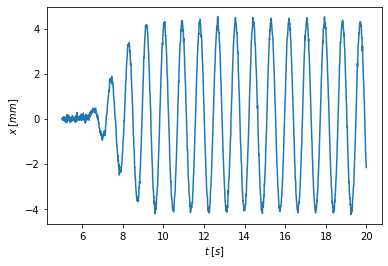

In [5]:
plt.figure()
plt.plot(data_raw.Time, data_raw.ODS_raw)
plt.xlabel('$t \; [s]$')
plt.ylabel('$x \; [mm]$')

1. Compute the velocity and acceleration by differentiating the signal. For the differentiation, pick any finite difference formulation you consider appropriate. <br>
Then, study the frequency content of the three signals (displacement, velocity and acceleration). <br>
What do you see and why?

In [6]:
# Commented lines, to check if the datas where equally spaced in time

# t_check = np.linspace(data_raw.Time[0], data_raw.Time[data_raw.index[-1]], num=data_raw.shape[0])
# error = data_raw['Time'] - t_check
# print(max(error))
# print(min(error))

# The max & min error are equal to the machine error. nevertheless the derivatives are takem
# with the delta_x array made with the difference between two consecutive times

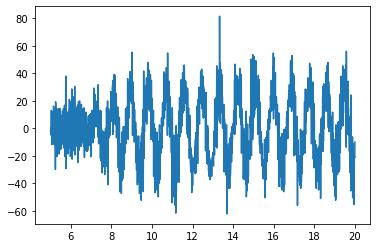

In [7]:
# First and second order derivative (velocity and acceleration) with first order schemes
x, y = np.array(data_raw.Time), np.array(data_raw['ODS_raw'])
y_prime_1st, y_prime2_1st = Diff_1st_order(x,y)
plt.plot(x, y_prime_1st)

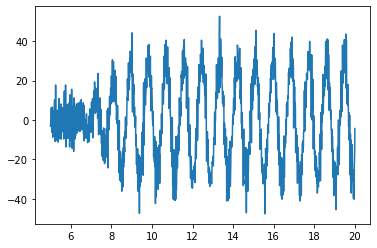

In [8]:
# First and second order derivative (velocity and acceleration) with second order schemes
y_prime_2nd, y_prime2_2nd = Diff_2nd_order(x,y)
plt.plot(x, y_prime_2nd)

In [9]:
# TO CHECK

#plt.plot(x, y_prime2_1st)
# plt.plot(x, y_prime2_2nd)
# plt.plot(x, np.gradient(y_prime_2nd, x, edge_order=2))
# plt.show()

In [10]:
# plt.plot(x, y_prime2_2nd)
# plt.plot(x, y_prime2_1st)
# error = abs(y_prime2_1st - y_prime2_2nd)
# print((error))

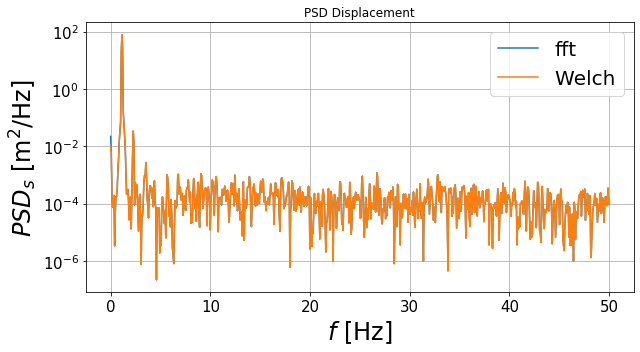

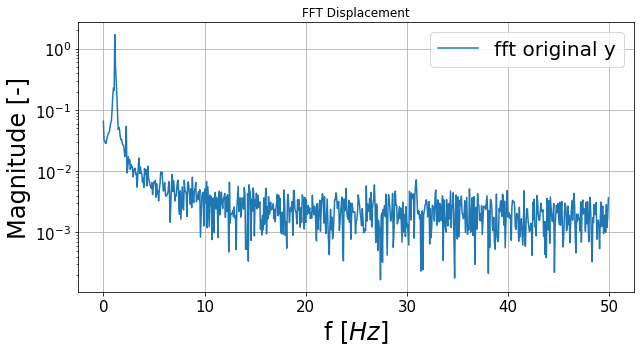

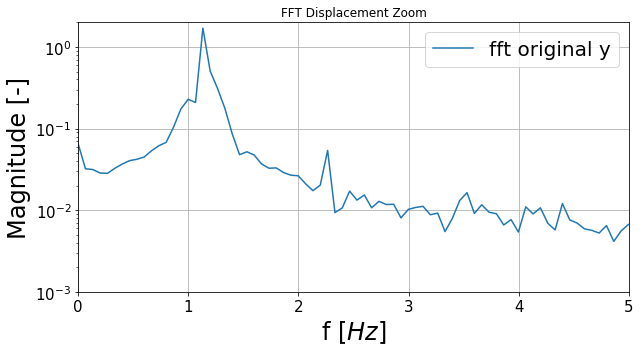

In [11]:
# PSD Displacement
dt = 0.01 #s
fs = 1/dt # Hz

Nt = data_raw['Time'].shape[0]
Ntseg = Nt

window = 'hann'
Nwelch = Ntseg

f_welch_x, psd_x = signal.welch(data_raw['ODS_raw'], fs, window, Nwelch, Nwelch/2,
                              axis=0)
f_fft_x = np.arange(Nt//2+1)/Nt*fs
fft_x = np.fft.rfft(data_raw['ODS_raw']*get_window(window, Nt))/np.sqrt(fs*(Nt//2+1))*np.sqrt(8./3.)

y_fft=(np.fft.fft(y)) # * general_hamming(Nt, 0.54) #*get_window(window, Nt))
freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)


fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_fft_x, np.abs(fft_x)**2,label='fft')
plt.semilogy(f_welch_x, psd_x,label='Welch')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Displacement')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD_s$ [m$^2$/Hz]',fontsize=24)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(freqs_fft[:len(freqs_fft)//2],np.abs(y_fft[:len(y_fft)//2])/Nt,label='fft original y')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [-]',fontsize=24)
#plt.xlim([0, 50])
plt.title('FFT Displacement')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(freqs_fft[:len(freqs_fft)//2],np.abs(y_fft[:len(y_fft)//2])/Nt,label='fft original y')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [-]',fontsize=24)
plt.xlim([0, 5])
plt.ylim([1e-3, 2])
plt.title('FFT Displacement Zoom')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

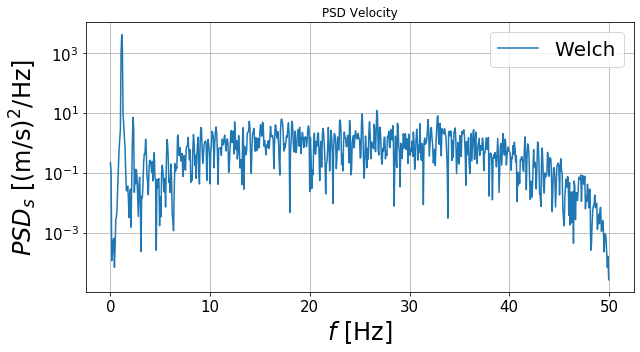

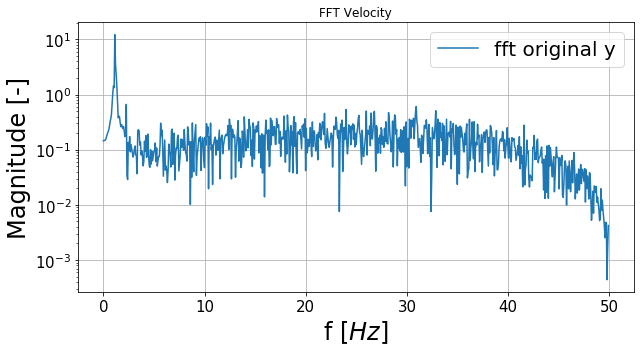

In [12]:
# PSD Velocity
f_welch_V, psd_V = signal.welch(y_prime_2nd, fs, window, Nwelch, Nwelch/2,
                              axis=0)
V_fft=(np.fft.fft(y_prime_2nd))
V_freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_welch_V, psd_V,label='Welch')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Velocity')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD_s$ [(m/s)$^2$/Hz]',fontsize=24)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(V_freqs_fft[:len(V_freqs_fft)//2],np.abs(V_fft[:len(V_fft)//2])/Nt,label='fft original y')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [-]',fontsize=24)
#plt.xlim([0, 50])
plt.title('FFT Velocity')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

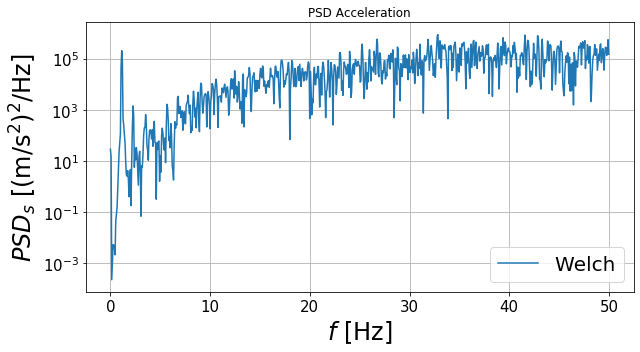

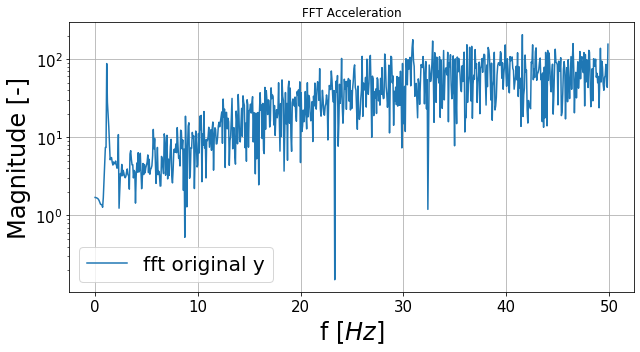

In [13]:
# PSD Acceleration
f_welch_acc, psd_acc = signal.welch(y_prime2_2nd, fs, window, Nwelch, Nwelch/2,
                              axis=0)
acc_fft=(np.fft.fft(y_prime2_2nd))
acc_freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_welch_acc, psd_acc,label='Welch')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Acceleration')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD_s$ [(m/s$^2$)$^2$/Hz]',fontsize=24)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(acc_freqs_fft[:len(acc_freqs_fft)//2],np.abs(acc_fft[:len(acc_fft)//2])/Nt,label='fft original y')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [-]',fontsize=24)
#plt.xlim([0, 50])
plt.title('FFT Acceleration')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

In [14]:
# DA COMMENTARE I RISULTATI

In [15]:
# Exercise 2: FIR or IIR filters

In [16]:
# I choose FIR filtering in order to have a not dipersive relation and to be able to manage the phase lag 
# due to the filtering

# Non-causal convolution would have very low (negligible) phase lag. But it needs information from "future" 
# points to compute the convolution at a certain time. We don't want to lose information in the last 
# points, for this reson NC convolution is not taken into account for this analysis

# Recursive formula, causal convolution (using zero-padding i.e.) or multiplication in freq domain (fft)
# obtain almost identical results (except at the initial BC, where fft is different from the other 2)
# but with a non-negligible phase lag wrt the original signal

# As seen during the SP classes, to solve this problem we can apply the filter twice (once on the filtered 
# and flipped signal).
# This would lead to BC problems both at the start and the end of the signal. This problem is adressed in the
# pre-implemented function "filtfilt"

# The choice is then: signal.filtfilt

In [17]:
f_c = 2 #Hz

N_O=100 # this is the order of the filter
h_impulse_100 = firwin(N_O, f_c/fs*2, window='hamming') # f_c/fs*2 is to normalize the results
N_O=200 # this is the order of the filter
h_impulse_200 = firwin(N_O, f_c/fs*2, window='hamming') 
N_O=300 # this is the order of the filter
h_impulse_300 = firwin(N_O, f_c/fs*2, window='hamming') 

# NOTE: Different windows lead to slightly different results. Hann lead to little overshoot before the 
#       Negative slope

# This doesn't make much sense. My signal is made of 1501 samples. Using a filter of order 500 is not
# appropriate
N_O=500 # this is the order of the filter
h_impulse_500 = firwin(N_O, f_c/fs*2, window='hamming')

# Plot one : the impulse response 
# fig, ax = plt.subplots(figsize=(9,5)) # Create Signal Noisy and Clean
# plt.plot(t_k[0:100],h_impulse_100 ,label='O100')
# plt.plot(t_k[0:300],h_impulse_300 ,label='O300')
# plt.plot(t_k[0:500],h_impulse_500 ,label='O500')
# plt.legend(fontsize=20)
# plt.xlabel('$t_k [s]$',fontsize=24)
# plt.ylabel('$h$',fontsize=24)
# plt.tight_layout()
# plt.savefig('h_impluses_FIR.png', dpi=100)      
# plt.show()

# Impulse response very similar to a sinc.
# By construction it will always be symmetric

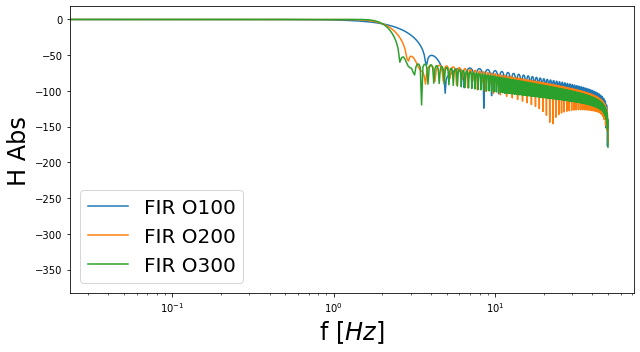

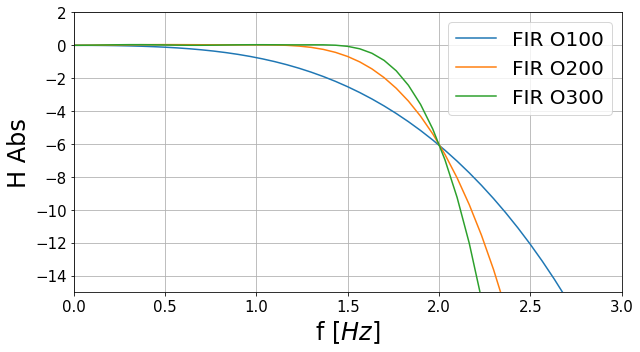

In [18]:
n_f = Nt
dtheta= 2*np.pi/n_f                                                          
#Angular discretization in 0, 2 pi
theta_n_1=np.linspace(0,Nt-1, Nt)*dtheta         
# or... angular discretization in -pi, pi:
theta_n_2=np.linspace(0,Nt-1, Nt)*dtheta-np.pi    

sys_100 = signal.TransferFunction(h_impulse_100, 1, dt=1)
w_FIR_100, mag_FIR_100, phase_FIR_100 = sys_100.bode(w=theta_n_2)

sys_200 = signal.TransferFunction(h_impulse_200, 1, dt=1)
w_FIR_200, mag_FIR_200, phase_FIR_200 = sys_200.bode(w=theta_n_2)

sys_300 = signal.TransferFunction(h_impulse_300, 1, dt=1)
w_FIR_300, mag_FIR_300, phase_FIR_300 = sys_300.bode(w=theta_n_2)


fig, ax = plt.subplots(figsize=(9,5))
plt.semilogx(w_FIR_100/np.pi*fs/2,mag_FIR_100,label='FIR O100')
plt.semilogx(w_FIR_200/np.pi*fs/2,mag_FIR_200,label='FIR O200')
plt.semilogx(w_FIR_300/np.pi*fs/2,mag_FIR_300,label='FIR O300')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H Abs',fontsize=24)
plt.tight_layout()
# plt.savefig('H_FIR_log.png', dpi=100)      
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.plot(w_FIR_100/np.pi*fs/2,mag_FIR_100,label='FIR O100')
plt.plot(w_FIR_200/np.pi*fs/2,mag_FIR_200,label='FIR O200')
plt.plot(w_FIR_300/np.pi*fs/2,mag_FIR_300,label='FIR O300')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H Abs',fontsize=24)
plt.xlim([0, 3])
plt.ylim([-15,2])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.tight_layout()
# plt.savefig('H_FIR_log.png', dpi=100)      
plt.show()

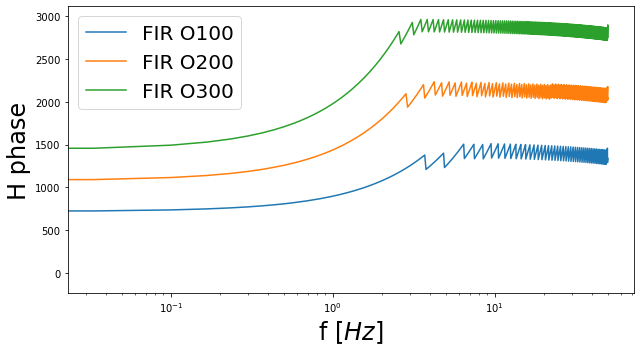

In [19]:
# The plot in the classic log vs decibel form are the following:
fig, ax = plt.subplots(figsize=(9,5)) 
plt.semilogx(w_FIR_100/np.pi*fs/2,phase_FIR_100,label='FIR O100')
plt.semilogx(w_FIR_200/np.pi*fs/2,phase_FIR_200,label='FIR O200')
plt.semilogx(w_FIR_300/np.pi*fs/2,phase_FIR_300,label='FIR O300')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H phase',fontsize=24)
plt.tight_layout()
# plt.savefig('H_FIR_log_ph.png', dpi=100)      
plt.show()

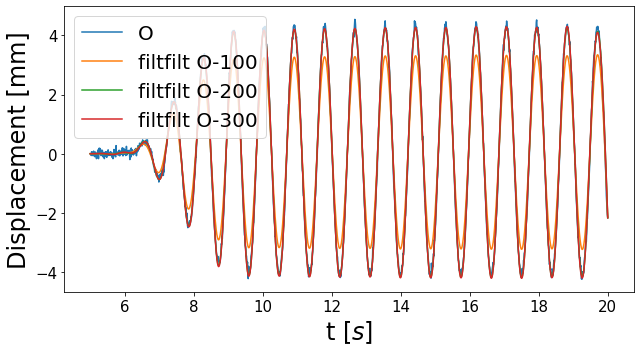

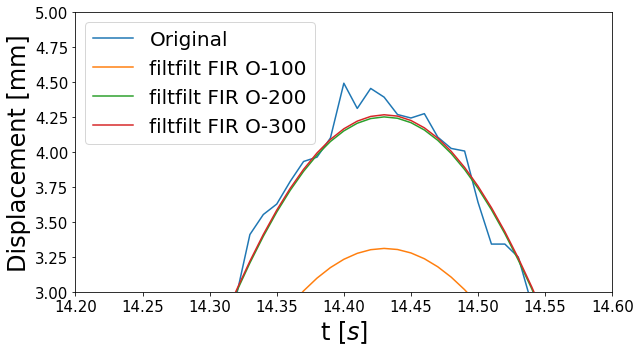

In [20]:
y_filt_filt_100=signal.filtfilt(h_impulse_100,1,data_raw['ODS_raw'])
y_filt_filt_200=signal.filtfilt(h_impulse_200,1,data_raw['ODS_raw'])
y_filt_filt_300=signal.filtfilt(h_impulse_300,1,data_raw['ODS_raw'])

fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='O')
plt.plot(data_raw['Time'],y_filt_filt_100,label='filtfilt O-100')
plt.plot(data_raw['Time'],y_filt_filt_200,label='filtfilt O-200')
plt.plot(data_raw['Time'],y_filt_filt_300,label='filtfilt O-300')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('Displacement [mm]',fontsize=24)
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=100)      
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='Original')
plt.plot(data_raw['Time'],y_filt_filt_100,label='filtfilt FIR O-100')
plt.plot(data_raw['Time'],y_filt_filt_200,label='filtfilt FIR O-200')
plt.plot(data_raw['Time'],y_filt_filt_300,label='filtfilt FIR O-300')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('Displacement [mm]',fontsize=24)
plt.xlim([14.2, 14.6])
plt.ylim([3, 5])
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=100)      
plt.show()

In [21]:
# IIR
f_c_IIR = 2 #Hz
b3, a3 = signal.butter(3, f_c_IIR, 'lp', analog=False,fs=fs) # Filter coeffs
sys = signal.TransferFunction(b3, a3, dt=1) 
# Note that the result is in db by default !
w3, mag3, phase3 = sys.bode(w=theta_n_2) 

b5, a5 = signal.butter(5, f_c_IIR, 'lp', analog=False,fs=fs) # Filter coeffs
sys = signal.TransferFunction(b5, a5, dt=1) 
# Note that the result is in db by default !
w5, mag5, phase5 = sys.bode(w=theta_n_2) 

b7, a7 = signal.butter(7, f_c_IIR, 'lp', analog=False,fs=fs) # Filter coeffs
sys = signal.TransferFunction(b7, a7, dt=1) 
# Note that the result is in db by default !
w7, mag7, phase7 = sys.bode(w=theta_n_2) 

b9, a9 = signal.butter(9, f_c_IIR, 'lp', analog=False,fs=fs) # Filter coeffs
sys = signal.TransferFunction(b9, a9, dt=1) 
# Note that the result is in db by default !
w9, mag9, phase9 = sys.bode(w=theta_n_2) 

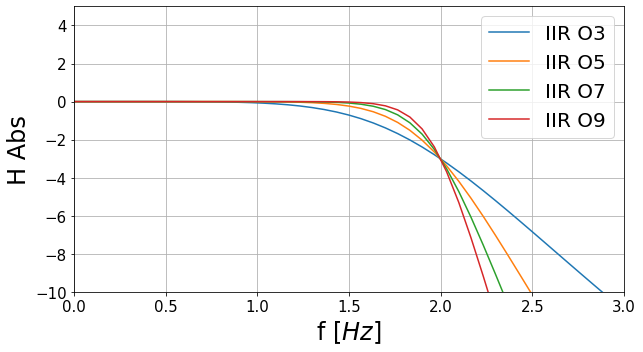

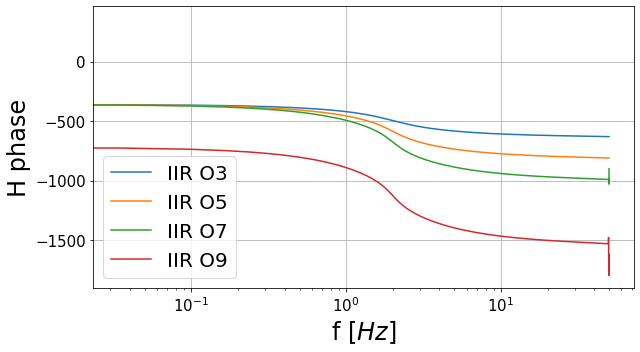

In [22]:
fig, ax = plt.subplots(figsize=(9,5)) # Create Signal Noisy and Clean
# plt.semilogx(w3/np.pi*fs/2,mag3,label='O3')
plt.plot(w3/np.pi*fs/2,mag3,label='IIR O3')
plt.plot(w3/np.pi*fs/2,mag5,label='IIR O5')
plt.plot(w3/np.pi*fs/2,mag7,label='IIR O7')
plt.plot(w3/np.pi*fs/2,mag9,label='IIR O9')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H Abs',fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('H_IRR_log.png', dpi=100) 
plt.xlim([0,3])
plt.ylim([-10,5])
plt.grid()
plt.show()
    
    
# The plot in the classic log vs decibel form are the following:
fig, ax = plt.subplots(figsize=(9,5)) # Create Signal Noisy and Clean
plt.semilogx(w3/np.pi*fs/2,phase3,label='IIR O3')
plt.semilogx(w3/np.pi*fs/2,phase5,label='IIR O5')
plt.semilogx(w3/np.pi*fs/2,phase7,label='IIR O7')
plt.semilogx(w3/np.pi*fs/2,phase9,label='IIR O9')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H phase',fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('H_IRR_log_ph.png', dpi=100)    
plt.grid()
plt.show()

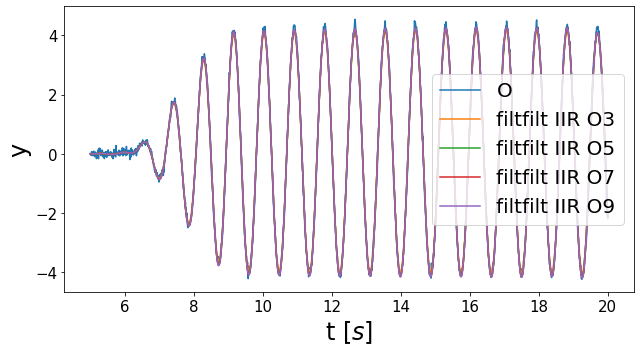

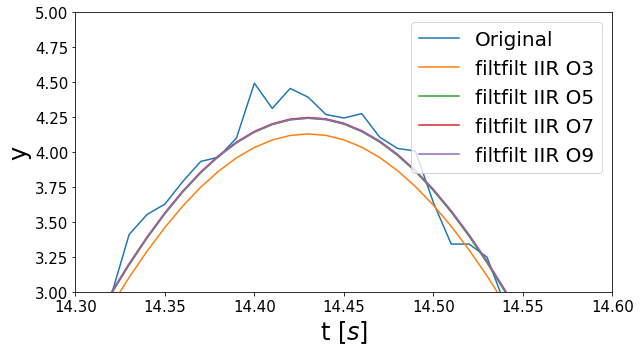

In [23]:
y_filt_filt_O3=signal.filtfilt(b3,a3,data_raw['ODS_raw'], padlen=300)
y_filt_filt_O5=signal.filtfilt(b5,a5,data_raw['ODS_raw'], padlen=300)
y_filt_filt_O7=signal.filtfilt(b7,a7,data_raw['ODS_raw'], padlen=300)
y_filt_filt_O9=signal.filtfilt(b9,a9,data_raw['ODS_raw'], padlen=300)

fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='O')
plt.plot(data_raw['Time'],y_filt_filt_O3,label='filtfilt IIR O3')
plt.plot(data_raw['Time'],y_filt_filt_O5,label='filtfilt IIR O5')
plt.plot(data_raw['Time'],y_filt_filt_O7,label='filtfilt IIR O7')
plt.plot(data_raw['Time'],y_filt_filt_O9,label='filtfilt IIR O9')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=O5)      
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='Original')
plt.plot(data_raw['Time'],y_filt_filt_O3,label='filtfilt IIR O3')
plt.plot(data_raw['Time'],y_filt_filt_O5,label='filtfilt IIR O5')
plt.plot(data_raw['Time'],y_filt_filt_O7,label='filtfilt IIR O7')
plt.plot(data_raw['Time'],y_filt_filt_O9,label='filtfilt IIR O9')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.xlim([14.3, 14.6])
plt.ylim([3, 5])
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=100)      
plt.show()

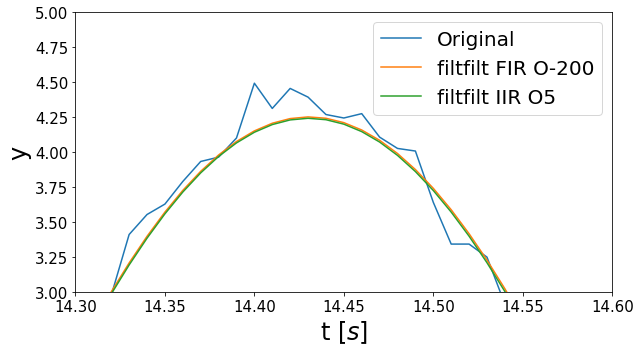

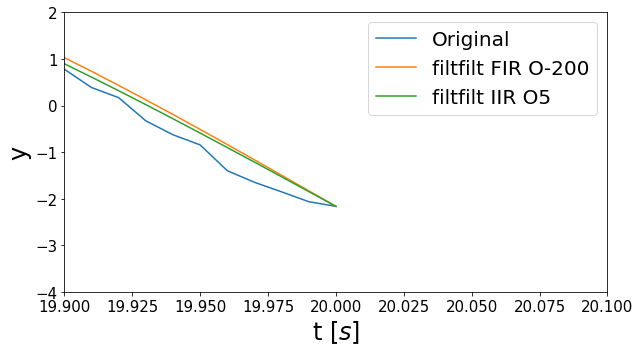

In [24]:
fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='Original')
plt.plot(data_raw['Time'],y_filt_filt_200,label='filtfilt FIR O-200')
plt.plot(data_raw['Time'],y_filt_filt_O5,label='filtfilt IIR O5')
# plt.plot(data_raw['Time'],y_filt_filt_O9,label='filtfilt O9')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.xlim([14.3, 14.6])
plt.ylim([3, 5])
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=100)      
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'],data_raw['ODS_raw'],label='Original')
plt.plot(data_raw['Time'],y_filt_filt_200,label='filtfilt FIR O-200')
plt.plot(data_raw['Time'],y_filt_filt_O5,label='filtfilt IIR O5')
# plt.plot(data_raw['Time'],y_filt_filt_O9,label='filtfilt O9')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('t $[s]$',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.xlim([19.9, 20.1])
plt.ylim([-4, 2])
plt.tight_layout()
# plt.savefig('zero_phase_shift.png', dpi=100)      
plt.show()

In [25]:
# Exercise 3: Compute derivatives in the Fourier Domain.

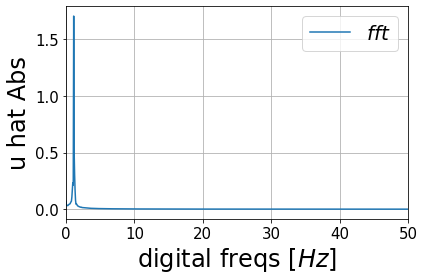

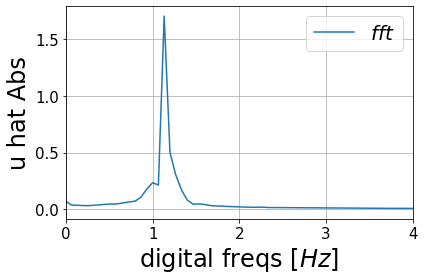

In [26]:
y_filt_fft=(np.fft.fft(y_filt_filt_200)) # * general_hamming(Nt, 0.54) #*get_window(window, Nt))
freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2],np.abs(y_filt_fft[:len(y_filt_fft)//2])/Nt,label='$fft$')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('digital freqs $[Hz]$',fontsize=24)
plt.ylabel('u hat Abs',fontsize=24)
plt.xlim([0, 50])
plt.grid()
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2],np.abs(y_filt_fft[:len(y_filt_fft)//2])/Nt,label='$fft$')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('digital freqs $[Hz]$',fontsize=24)
plt.ylabel('u hat Abs',fontsize=24)
plt.xlim([0, 4])
plt.grid()
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

<Figure size 432x288 with 0 Axes>

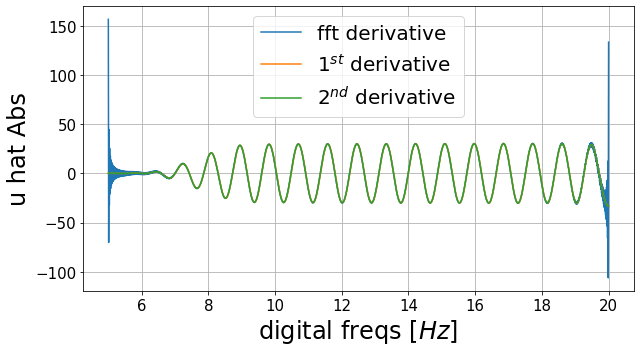

In [27]:

kappa =  np.linspace(0,Nt-1,Nt) - (Nt-1)/2 
kappa *= 2 * np.pi / (x[-1]-x[0])
kappa = np.fft.fftshift(kappa)
y_filt_fft_prime = 1j * kappa * y_filt_fft
dfFFT = np.real(np.fft.ifft(y_filt_fft_prime))

y_filt_prime_1st, y_filt_prime2_1st = Diff_1st_order(x,y_filt_filt_200)
y_filt_prime_2nd, y_filt_prime2_2nd = Diff_2nd_order(x,y_filt_filt_200)

plt.figure()
plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'], dfFFT.real,label='fft derivative')
plt.plot(x, y_filt_prime_1st,label='$1^{st}$ derivative')
plt.plot(x, y_filt_prime_2nd,label='$2^{nd}$ derivative')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('digital freqs $[Hz]$',fontsize=24)
plt.ylabel('u hat Abs',fontsize=24)
plt.grid()
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

<Figure size 432x288 with 0 Axes>

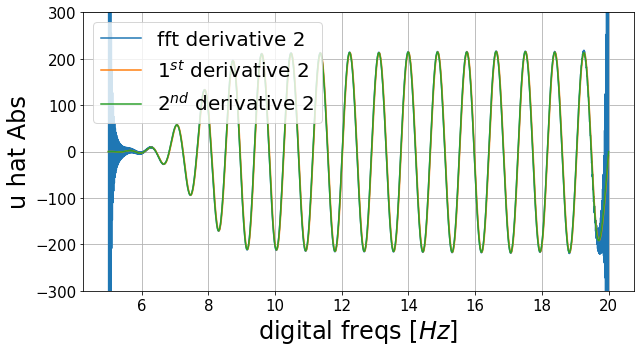

In [28]:
y_filt_fft_prime2 = -kappa**2 * y_filt_fft
ddfFFT = np.real(np.fft.ifft(y_filt_fft_prime2))


plt.figure()
plt.subplots(figsize=(9,5)) 
plt.plot(data_raw['Time'], ddfFFT.real,label='fft derivative 2')
plt.plot(x, y_filt_prime2_1st,label='$1^{st}$ derivative 2')
plt.plot(x, y_filt_prime2_2nd,label='$2^{nd}$ derivative 2')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('digital freqs $[Hz]$',fontsize=24)
plt.ylabel('u hat Abs',fontsize=24)
plt.ylim([-300, 300])
plt.grid()
plt.tight_layout()
# plt.savefig('Absolute Values_shifted_and_f.png', dpi=100)      
plt.show()

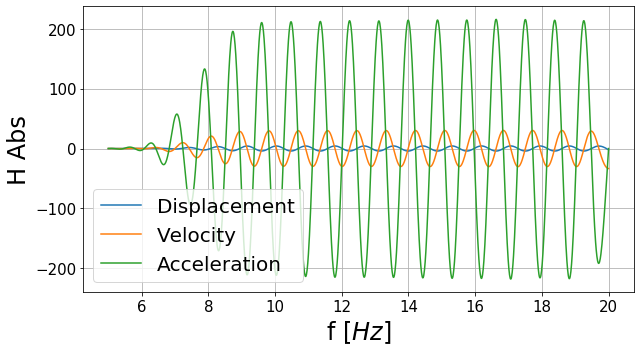

In [29]:
fig, ax = plt.subplots(figsize=(9,5))
plt.plot(x, y_filt_filt_200, label='Displacement')
plt.plot(x, y_filt_prime_2nd, label='Velocity')
plt.plot(x, y_filt_prime2_2nd, label='Acceleration')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('H Abs',fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('H_IRR_log.png', dpi=100) 
plt.grid()
plt.show()